#Projeto: Análise dos Dados da Polícia Rodoviária Federal de Acidentes nas Rodovias e Posicionamento de Radares
Fonte PRF: [Dados Abertos da PRF]( https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf)

Fonte Radares: [Dados Radares](https://dados.gov.br/dados/conjuntos-dados/radar)


## 1- Objetivo da Análise

Este projeto tem como objetivo analisar as causas dos acidentes nas rodovias do Brasil e se há relação com o posicionamento dos radares.

- Analisar a eficácia dos radares e o impacto dos radares na redução de acidentes.

- Identificar rodovias com maior concentração de acidentes e avaliar a presença de radares nesses locais.

- Avaliar a gravidade dos acidentes ocorridos em diferentes trechos das rodovias.

- Conduzir uma análise estatística para determinar a correlação entre a presença de radares e a diminuição na frequência de acidentes.

- Considerar não apenas os aspectos de segurança, mas também as implicações econômicas decorrentes dos acidentes.



##2-  Entendimento dos Dados


###2.1- Dados dos Acidentes da PRF

Os dados de acidentes de trânsito utilizados neste estudo foram coletados no site da Policia Rodoviária Federal em [Dados Abertos da PRF]( https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf)
e abrangem o período de janeiro de 2021 a julho de 2023. Essa base oficial é de acesso público e contém registros de acidentes ocorridos nas rodovias de todo o Brasil durante esse intervalo.

A existência desses dados desempenha um papel crucial na tomada de decisões embasadas e na adoção de medidas destinadas a aprimorar a segurança nas estradas em nível nacional.

####2.2.1- Dicionário dos Dados
| Número | Nome da Variável           | Descrição                                               |
|--------|----------------------------|---------------------------------------------------------|
| 1      | id                         | Variável com valores numéricos, representando o identificador do acidente. |
| 2      | data_inversa               | Data da ocorrência no formato aaaa/mm/dd.               |
| 3      | dia_semana                 | Dia da semana da ocorrência. Ex.: Segunda, Terça, etc. |
| 4      | horário                    | Horário da ocorrência no formato hh:mm:ss.              |
| 5      | uf                         | Unidade da Federação. Ex.: MG, PE, DF, etc.             |
| 6      | br                         | Variável com valores numéricos, representando o identificador da BR do acidente. |
| 7      | km                         | Identificação do quilômetro onde ocorreu o acidente, com valor mínimo de 0,1 km e com a casa decimal separada por ponto. |
| 8      | municipio                  | Nome do município de ocorrência do acidente.           |
| 9      | causa_acidente             | Identificação da causa principal do acidente. Neste conjunto de dados são excluídos os acidentes com a variável causa principal igual a “Não”. |
| 10     | tipo_acidente              | Identificação do tipo de acidente. Ex.: Colisão frontal, Saída de pista, etc. Neste conjunto de dados são excluídos os tipos de acidentes com ordem maior ou igual a dois. A ordem do acidente demonstra a sequência cronológica dos tipos presentes na mesma ocorrência. |
| 11     | classificação_acidente     | Classificação quanto à gravidade do acidente: Sem Vítimas, Com Vítimas Feridas, Com Vítimas Fatais e Ignorado. |
| 12     | fase_dia                   | Fase do dia no momento do acidente. Ex. Amanhecer, Pleno dia, etc. |
| 13     | sentido_via                | Sentido da via considerando o ponto de colisão: Crescente e decrescente. |
| 14     | condição_meteorologica     | Condição meteorológica no momento do acidente: Céu claro, chuva, vento, etc. |
| 15     | tipo_pista                 | Tipo da pista considerando a quantidade de faixas: Dupla, simples ou múltipla. |
| 16     | tracado_via                | Descrição do traçado da via.                            |
| 17     | uso_solo                   | Descrição sobre as características do local do acidente: Urbano=Sim;Rural=Não. |
| 18     | pessoas                    | Total de pessoas envolvidas na ocorrência.             |
| 19     | mortos                     | Total de pessoas mortas envolvidas na ocorrência.      |
| 20     | feridos_leves              | Total de pessoas com ferimentos leves envolvidas na ocorrência. |
| 21     | feridos_graves             | Total de pessoas com ferimentos graves envolvidas na ocorrência. |
| 22     | ilesos                     | Total de pessoas ilesas envolvidas na ocorrência.      |
| 23     | ignorados                  | Total de pessoas envolvidas na ocorrência e que não se soube o estado físico. |
| 24     | feridos                    | Total de pessoas feridas envolvidas na ocorrência (é a soma dos feridos leves com os graves). |
| 25     | veiculos                   | Total de veículos envolvidos na ocorrência.            |
| 26     | latitude                   | Latitude do local do acidente em formato geodésico decimal. |
| 27     | longitude                  | Longitude do local do acidente em formato geodésico decimal. |
| 28     | regional                   | Superintendência regional da PRF cujo acidente ocorreu dentro dos limites de sua circunscrição. Atenção nem sempre a UF da regional coincide com a UF do acidente. Ex: A circunscrição da SPRF-DF grande parte está localizada na UF “GO”. |
| 29     | delegacia                  | Delegacia da PRF cujo acidente ocorreu dentro dos limites de sua circunscrição. |
| 30     | uop                        | UOP=Unidade operacional. Unidade operacional da PRF cujo acidente ocorreu dentro dos limites de sua circunscrição. |


In [1]:
# Mapeando bibliotecas necessárias para o projeto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

####2.1.2- Visualização da Base de Dados da PRF

In [2]:
# Carregando dados 2021
df_prf_21 = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Analise_Dados/datatran2021.csv',
                      delimiter= ';', encoding = 'ISO-8859-1')

In [3]:
# Carregando dados 2022
df_prf_22= pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Analise_Dados/datatran2022.csv',
                      delimiter= ';', encoding = 'ISO-8859-1')

In [4]:
# Carregando dados 2023
df_prf_23 = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Analise_Dados/Dados_PRF_2023.csv',
                         delimiter= ';',
                         encoding = 'ISO-8859-1')

In [ ]:
# Visualizando os números de linhas e colunas dados 2021
df_prf_21.shape

(64539, 30)

In [ ]:
# Visualizando os números de linhas e colunas dados 2022
df_prf_22.shape

(64547, 30)

In [ ]:
# Visualizando os números de linhas e colunas dados 2023
df_prf_23.shape

(32440, 30)

In [6]:
# Concatenando os três data frames
df_concat = pd.concat ([df_prf_21, df_prf_22, df_prf_23], axis=0)

In [ ]:
# Visualizando o número de linhas e colunas
df_concat.shape

(161526, 30)

In [ ]:
# Visualizando as primeiras linhas
df_concat.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116.0,453,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,0,1,1,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174.0,937,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,5,0,1,4,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,Tombamento,...,0,0,1,2,2,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493.0,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,0,1,0,1,2,"-22,6687122","-43,01862696",SPRF-RJ,DEL02-RJ,UOP04-DEL02-RJ
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393.0,252,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,1,1,0,2,2,"-22,43422023","-43,77561487",SPRF-RJ,DEL05-RJ,UOP02-DEL05-RJ


In [ ]:
# Visualizando as últimas linhas
df_concat.tail()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
32435,536157.0,2023-06-25,domingo,05:10:00,SP,101.0,41,UBATUBA,Ingestão de álcool pelo condutor,Tombamento,...,0,1,0,0,1,"-23,41971433","-45,0428663",SPRF-SP,DEL06-SP,UOP01-DEL06-SP
32436,536172.0,2023-06-23,sexta-feira,02:30:00,RS,386.0,"279,4",SAO JOSE DO HERVAL,Condutor Dormindo,Saída de leito carroçável,...,1,0,0,1,1,"-29,02337709","-52,31543541",SPRF-RS,DEL04-RS,UOP03-DEL04-RS
32437,536173.0,2023-06-24,sábado,13:40:00,PR,163.0,"133,3",CAPITAO LEONIDAS MARQUES,Retorno proibido,Colisão transversal,...,0,2,0,3,2,"-25,55452378","-53,58756077",SPRF-PR,DEL05-PR,UOP05-DEL05-PR
32438,536265.0,2023-01-09,segunda-feira,10:00:00,MG,267.0,"80,5",JUIZ DE FORA,Condutor Dormindo,Saída de leito carroçável,...,0,1,0,0,1,"-21,75478617","-43,21241781",SPRF-MG,DEL05-MG,UOP01-DEL05-MG
32439,536330.0,2023-06-02,sexta-feira,15:30:00,SC,470.0,60,BLUMENAU,Retorno proibido,Colisão transversal,...,0,0,1,1,2,"-26,87957612","-49,1716308",SPRF-SC,DEL04-SC,UOP01-DEL04-SC


In [7]:
#Gerando metadados
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

metadata_df = generate_metadata(df_concat)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,veiculos,int64,0,0.00,15
1,feridos,int64,0,0.00,45
2,ignorados,int64,0,0.00,18
3,ilesos,int64,0,0.00,56
4,feridos_graves,int64,0,0.00,20
5,feridos_leves,int64,0,0.00,39
6,mortos,int64,0,0.00,10
7,pessoas,int64,0,0.00,63
8,id,float64,0,0.00,161526
9,br,float64,442,0.27,119


- A partir da visualização dos metadados podemos observar alguns valores nulos, nas variáveis `br`, `km`, `regional`, `delegacia` e `uop`. Mesmo com a presença de valores nulos na tabela, será viável manter a consistência na análise dessas colunas, uma vez que a coluna com a maior incidência de nulos é a delegacia, apresentando apenas 0,67% dos valores faltantes.
- Para lidar com os valores nulos, optei por atribuir o valor "desconhecido" às variáveis do tipo objeto, enquanto à variável `br`, escolhi preenchê-la com 000. Vale ressaltar que não existe uma rodovia denominada BR 000, o que a destacará claramente das demais.
- As variáveis `longitude` e `latitude` se encontram como objeto. Irei ajustá-las para numéricas.
- As coluna `horário` e `data_inversa` também irei ajustá-las. Neste caso, ajustarei para o formato de datetime.
- Estas alterações serão feitas mais adiante no projeto.

In [ ]:
#Análise estatística das variáveis numéricas
df_concat.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,161526.000000,161084.000000,161526.000000,161526.000000,161526.000000,161526.000000,161526.000000,161526.000000,161526.000000,161526.000000
mean,433774.424105,211.308510,2.389188,0.083535,0.850612,0.277336,1.016610,0.161095,1.127948,1.655591
std,60757.507906,130.478223,2.012310,0.335358,1.058369,0.614599,1.587586,0.480914,1.181120,0.721883
min,331693.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,379076.250000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,443320.000000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,488429.750000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,536330.000000,495.000000,75.000000,19.000000,61.000000,31.000000,58.000000,54.000000,62.000000,21.000000


- A quantidade total de acidentes registrados ao longo das rodovias federais brasileiras entre janeiro de 2021 e julho de 2023 é de 161.526.

- O maior número de pessoas envolvidas em um único acidente foi de 75, enquanto a média de pessoas envolvidas foi de 2, aproximando-se da mediana que é 2.38.

- Quanto às vítimas fatais nos acidentes registrados, a média é de 0 pessoas, enquanto a mediana é de 0.08, indicando que uma pequena parcela dos acidentes resulta em vítimas fatais.

- A média de pessoas envolvidas em ferimentos leves e ilesos é de 1, enquanto a média de feridos graves é de 0, sugerindo que a maioria dos registros envolve acidentes de menor gravidade.

- A média de veículos envolvidos é de 1.65, indicando que a maioria dos acidentes registrados envolve de 1 a 2 veículos.

In [ ]:
# Análise estatística da variáveis categóricas
df_concat.describe(include='object')

,data_inversa,dia_semana,horario,uf,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,latitude,longitude,regional,delegacia,uop
count,161526,161526,161526,161526,161084,161526,161526,161526,161526,161526,161526,161526,161526,161526,161526,161526,161526,161520,160447,161328
unique,911,7,1435,27,8879,1928,73,17,3,4,3,10,3,10,2,68095,68070,28,151,403
top,2021-08-08,domingo,19:00:00,MG,2,BRASILIA,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,"-27,59193546","-48,61824557",SPRF-MG,DEL01-PR,UOP01-DEL01-SC
freq,281,27164,2301,20851,701,2367,19986,30573,121392,87335,86198,98318,79742,96026,90565,195,195,20809,6928,2597


- O dia com o maior número de acidentes é domingo, totalizando 27.164 registros, sendo que o horário mais crítico é às 19h. Esses dados sugerem que aos finais de semana há uma incidência maior de acidentes, possivelmente devido ao aumento do fluxo de veículos nas rodovias nesse período.

- A causa mais frequente de acidentes é a "reação tardia ou ineficiente do condutor", com 19.986 registros.

- A colisão traseira é a causa mais comum de acidentes, contabilizando 30.573 registros.

- Minas Gerais (MG) é o estado com o maior número de incidentes, totalizando 20.851 registros. Essa estatística pode ser atribuída à extensa malha rodoviária de MG, uma das maiores do Brasil, com 7.689 km de rodovias federais.

- Quanto ao traçado da via, retas lideram com 96.026 registros, indicando que acidentes são mais frequentes em trechos de vias retas.

###2.2- Dados Radares nas Rodovias Federais


Os dados relativos aos radares de trânsito nas rodovias federais do Brasil estão acessíveis ao público por meio do portal "Dados.gov.br" do governo federal. Para consultar essas informações, utilize o link [Dados Radares](https://dados.gov.br/dados/conjuntos-dados/radar). Esses dados são providos pela Agência Nacional de Transportes Terrestres (ANTT), órgão responsável pela regulamentação e fiscalização do transporte terrestre no país.

As concessionárias de rodovias coletam e inserem as informações sobre os radares, as quais são posteriormente disponibilizadas na plataforma da ANTT. Esse procedimento viabiliza o acesso público a dados cruciais, incluindo a localização e operação dos radares, promovendo a segurança viária e facilitando a tomada de decisões embasadas em dados.

A última atualização dos dados dos Radares foi em dezembro de 2023.

####2.2.1- Dicionário dos Dados

| Campo               | Descrição                                                                |
|---------------------|--------------------------------------------------------------------------|
| concessionaria      | Nome da Concessionária que prestou as informações.                      |
| ano_do_pnv_snv      | Ano que representa as informações no Plano Nacional de Viação e Sistema |
|                     | Nacional de Viação. Ex.: 2017                                          |
| tipo_de_radar       | Tipo de radar (Redutor ou Controlador).                                 |
| rodovia             | Rodovia responsável pela concessionária. Ex.: BR-116.                   |
| uf                  | Sigla do Estado da rodovia. Ex.: SP.                                    |
| km_m                | Representação do quilômetro mais a metragem. Ex.: 317,940.              |
| Município           | Município da localização do radar.                                      |
| tipo_de_pista       | Tipo da pista que está localizada a sinalização (principal ou marginal)|
| sentido             | Representação da ordem crescente ou decrescente ou crescente/decrescente|
| situacao            | Situação atual (ativo ou inativo).                                      |
| data_da_inativacao  | Data de registro, caso a situação seja dada como inativo.               |
| latitude            | Representação de Coordenadas. Ex.: -22,490967.                         |
| longitude           | Representação de Coordenadas. Ex.: -44,561228                          |
| velocidade_leve     | Velocidade da Rodovia para veículos leves.                             |



####2.2.2- Visualização da Base de Dados de Radares

In [8]:
#Carregando dados dos radares
df_radar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analise_Dados/dados_dos_radares.csv',
                       delimiter= ';', encoding = 'ISO-8859-1')

In [ ]:
#Visualizando números de linhas e colunas
df_radar.shape

(613, 15)

In [ ]:
# Visualizando as primeira linhas
df_radar.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve,velocidade_pesado
0,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"483,700",Betim,Principal,Crescente,Ativo,NaN,"-19,959486","-44,085386",80,60
1,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"493,290",Betim,Principal,Crescente,Ativo,NaN,"-19,964349","-44,171924",80,60
2,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"525,350",Brumadinho,Principal,Crescente,Ativo,NaN,"-20,146664","-44,323897",80,60
3,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"528,350",Brumadinho,Principal,Decrescente,Ativo,NaN,"-20,167194","-44,334434",80,60
4,AUTOPISTA FERNÃO DIAS,2007,Controlador,BR-381,MG,"568,890",Itaguara,Principal,Decrescente,Ativo,NaN,"-20,410679","-44,526628",80,60


In [ ]:
# Visualizando as últimas linhas
df_radar.tail()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve,velocidade_pesado
608,VIA SUL,2019,Redutor,BR-386,RS,"388,000",Triunfo,Principal,Crescente,Ativo,NaN,"-29,695129","-51,693235",60,60
609,VIA SUL,2019,Controlador,BR-386,RS,"367,400",Fazenda Vilanova,Principal,Crescente,Ativo,NaN,"-29,581164","-51,841074",100,80
610,VIA SUL,2019,Controlador,BR-386,RS,"305,000",Pouso Novo,Principal,Crescente,Ativo,NaN,"-29,189548","-52,188429",60,80
611,VIA SUL,2019,Redutor,BR-386,RS,"270,800",Fontoura Xavier,Principal,Decrescente,Ativo,NaN,"-28,978289","-52,367937",60,60
612,VIA SUL,2019,Controlador,BR-386,RS,"245,200",Soledade,Principal,Decrescente,Ativo,NaN,"-28,803798","-52,507508",60,60


In [9]:
# Gerando Metadados

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

metadata_df = generate_metadata(df_radar)
metadata_df


,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ano_do_pnv_snv,int64,0,0.0,11
1,velocidade_leve,int64,0,0.0,8
2,velocidade_pesado,int64,0,0.0,7
3,data_da_inativacao,float64,613,100.0,0
4,concessionaria,object,0,0.0,20
5,tipo_de_radar,object,0,0.0,2
6,rodovia,object,0,0.0,20
7,uf,object,0,0.0,13
8,km_m,object,0,0.0,581
9,municipio,object,0,0.0,186



- A variável `data_da_inativacao` apresenta 100% de seus valores como nulos. Isso indica que todos os radares registrados na tabela estão atualmente em funcionamento. Diante dessa constatação, esta coluna será excluida durante a etapa de limpeza dos dados.

- Será necessário proceder com os ajustes nas colunas `latitude` e `longitude` para adequá-las aos seus formatos corretos.

- A coluna `km_m` nos fornece duas informações relevantes para nossa análise. Nesse sentido, um dos procedimentos a ser adotado consistirá na subdivisão desta coluna em outras duas, sendo uma destinada a representar os valores de 'km' e outra para os de 'm'.

In [ ]:
# Análise estatística das variáveis numericas
df_radar.describe()

,ano_do_pnv_snv,data_da_inativacao,velocidade_leve,velocidade_pesado
count,613.000000,0.0,613.000000,613.000000
mean,2016.119086,NaN,71.044046,66.933116
std,4.676514,NaN,20.758958,15.667827
min,2003.000000,NaN,40.000000,40.000000
25%,2015.000000,NaN,60.000000,60.000000
50%,2017.000000,NaN,60.000000,60.000000
75%,2020.000000,NaN,80.000000,80.000000
max,2021.000000,NaN,110.000000,100.000000


In [ ]:
# Análise estatística das variáveis categóricas
df_radar.describe(include='object')

,concessionaria,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,latitude,longitude
count,613,613,613,613,613,613,613,613,613,613,613
unique,20,2,20,13,581,186,2,3,1,585,584
top,CONCEBRA,Controlador,BR-101,GO,"30,000",Anápolis,Principal,Crescente,Ativo,"-12,954695","-38,471467"
freq,102,459,118,149,3,26,593,266,613,4,4


- A base de dados conta com 613 radares nas rodovias federais.
- Com base na análise estatística abrangendo dados numéricos e categóricos, podemos inferir que, para veículos leves, a velocidade mínima permitidas nos radares é de 40 km/h, a média é de 60 km/h, e a máxima atinge 110 km/h. No caso de veículos pesados, observamos uma velocidade mínima de 40 km/h, uma média de 60 km/h, e uma velocidade máxima de 100 km/h.
- O radar com maior representatividade é o controlador, o que é compreensível, dado que é o único capaz de aplicar sanções financeiras. A distinção entre esses tipos de radares é clara: enquanto o radar redutor visa conscientizar os condutores sobre a importância de reduzir a velocidade, o radar controlador vai além, implementando medidas punitivas para assegurar o cumprimento das normas de tráfego.
- O município que lidera em quantidade de radares é Anápolis, com um total de 26, enquanto o estado de Goiás destaca-se como o mais equipado, contando com um total de 149 radares.


## 3- Preparação dos Dados:

Nesta etapa será feita a limpeza dos dados, implementando as transformações essenciais identificadas durante a visualização, como tratamento de valores ausentes, ajustes no formato das coordenadas de latitude e longitude, além de otimização do formato das datas.

In [10]:
# copia dos dataframes
df_prf01 = df_concat.copy()
df_radar01 = df_radar.copy()

###3.1 Dados Acidentes nas Rodovias PRF


Durante esta etapa, serão implementados os devidos tratamentos, abordando:

**Tratamento de valores nulos:**
- Em variáveis do tipo "object" a estratégia adotada consistiu em preencher os valores ausentes com "desconhecido" com o intuito de preservar a integridade dos dados.

- Para variáveis `br` substitui esses espaços vazios por "000". Tal escolha foi deliberada, uma vez que esse valor destaca-se como discrepante em relação aos demais dados das colunas, proporcionando facilidade na identificação durante as análises subsequentes.


**Ajustes e Padronizações nas Colunas:**

- Em relação às variáveis de `latitude` e `longitude`, procedeu-se à substituição da vírgula por ponto, promovendo a adequação do tipo das variáveis para permitir análises mais precisas no futuro.

- Para as colunas `data_inversa` e `horario`, efetuou-se a conversão para o formato datetime, proporcionando maior facilidade no manuseio das informações de data e hora.

- A variável `km` passou por uma divisão, resultando em duas novas colunas: `Km`, destinada a representar os valores em quilômetros, e `m`, destinada a representar os valores em metros relativos à localização do acidente. Transformei a mesma em float e consequentemente os valores nulos foram preenchidos por "000".

- A coluna `br` será renomeada para 'rodovia' para alinhar-se com a coluna correspondente na base de dados dos radares.



####3.1.1- Tratamento de Valores Nulos

In [11]:
# Divisão da coluna Km e alteração para o formato float
df_prf01[['Km', 'm']] = df_prf01['km'].str.split(',', expand=True).astype(float)

In [12]:
# Preenchimento de valores nulos das variáveis object
var_categoricas = df_prf01.select_dtypes(include=['object']).columns
df_prf01[var_categoricas] = df_prf01[var_categoricas].fillna('desconhecido')

In [13]:
# Preenchimento de valores nulos das variáveis numéricas
var_numericas = df_prf01.select_dtypes(include=['float64','int64']).columns
df_prf01[var_numericas] = df_prf01[var_numericas].fillna(000)

####3.1.2 Adequação e Padronização nas Colunas

In [14]:
# Ajustando valores das colunas latitude e longitude. Alterando tipo para numérico.
df_prf01['latitude'] = df_prf01['latitude'].str.replace(',','.').astype(float)
df_prf01['longitude'] = df_prf01['longitude'].str.replace(',','.').astype(float)

In [15]:
# Alterando as colunas horário e data_inversa para datetime.
df_prf01['data_inversa'] = pd.to_datetime(df_prf01['data_inversa'], format='%Y-%m-%d')
df_prf01['horario'] = pd.to_datetime(df_prf01['horario'], format='%H:%M:%S')

In [16]:
# Alterando o nome da coluna br para rodovia
df_prf01= df_prf01.rename (columns={'br': 'rodovia'})

In [17]:
# Verificando metadados para validar que as transformações foram efetuadas.
generate_metadata(df_prf01)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,veiculos,int64,0,0.0,15
1,feridos,int64,0,0.0,45
2,ignorados,int64,0,0.0,18
3,ilesos,int64,0,0.0,56
4,feridos_graves,int64,0,0.0,20
5,feridos_leves,int64,0,0.0,39
6,mortos,int64,0,0.0,10
7,pessoas,int64,0,0.0,63
8,id,float64,0,0.0,161526
9,longitude,float64,0,0.0,68070


###3.2- Dados Radares

Durante esta etapa, serão implementados os devidos tratamentos, abordando:

**Tratamento de valores nulos:**
- A coluna `data_da_inativacao` será excluida, pois apresenta 100% de seus valores nulos.

**Ajustes e Padronizações nas Colunas:**

- Em relação às variáveis de `latitude` e `longitude`, procedeu-se à substituição da vírgula por ponto, promovendo a adequação do tipo das variáveis para permitir análises mais precisas no futuro.

- A variável `km` passou por uma divisão, resultando em duas novas colunas: 'Km', destinada a representar os valores em quilômetros, e 'm', destinada a representar os valores em metros relativos à localização do acidente.

- A coluna `ano_do_pnv_snv` efetuou-se a conversão para o formato datetime.

In [18]:
# Excluindo a coluna data_da_inativacao
df_radar01.drop(columns=['data_da_inativacao'],inplace=True)

In [ ]:
df_radar01.shape

(613, 14)

###3.2.2- Ajustes e Padronizações nas Colunas

In [19]:
# Ajustando valores das colunas latitude e longitude. Alterando tipo para numérico.
df_radar01['latitude'] = df_radar01['latitude'].str.replace(',','.').astype(float)
df_radar01['longitude'] =df_radar01['longitude'].str.replace(',','.').astype(float)


In [20]:
# Alterando coluna ano_do_pnv_snv  para datetime.
df_radar01['ano_do_pnv_snv '] = pd.to_datetime(df_radar01['ano_do_pnv_snv'], format='%Y')

In [21]:
# Divisão da coluna Km e alteração para o tipo numérico
df_radar01[['Km', 'm']] = df_radar01['km_m'].str.split(',', expand=True).astype(int)

In [22]:
generate_metadata(df_radar01)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,m,int64,0,0.0,195
1,ano_do_pnv_snv,int64,0,0.0,11
2,ano_do_pnv_snv,datetime64[ns],0,0.0,11
3,velocidade_pesado,int64,0,0.0,7
4,velocidade_leve,int64,0,0.0,8
5,Km,int64,0,0.0,390
6,longitude,float64,0,0.0,584
7,latitude,float64,0,0.0,585
8,situacao,object,0,0.0,1
9,concessionaria,object,0,0.0,20


##4- Análise Exploratória
- Nesta etapa, será conduzida uma análise exploratória dos dados de acordo com os objetivos do projeto.
- Utilizando a biblioteca Folium para visualizar o mapa do Brasil, destacando a distribuição dos acidentes e radares. A escolha da Folium facilitará a criação de mapas interativos, proporcionando uma representação visual eficaz dessas informações.
- Além disso, será feita uma visualizações que destacam a frequência dos acidentes ao longo das rodovias e a gravidade, proporcionando insights importantes sobre os padrões e áreas de risco.

###4.1- Distribuição de acidentes e radares no mapa

In [ ]:
!pip install folium -q

In [ ]:
import folium
# Criando um mapa centrado nas coordenadas do Brasil
m = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)

# Amostra aleatória dos acidentes e radares
sample_size = 200 # Número de pontos a serem amostrados

if len(df_prf01) > sample_size:
    df_prf01_sample = df_prf01.sample(n=sample_size, random_state=42)

if len(df_radar01) > sample_size:
    df_radar01_sample = df_radar01.sample(n=sample_size, random_state=42)

# Adicionando marcadores para cada acidente com tag de motivo
for index, row in df_prf01_sample.iterrows():
    tipo_acidente = row['tipo_acidente']
    folium.Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='red'),
                  popup=folium.Popup(f'Tipo do Acidente: {tipo_acidente}', parse_html=True)).add_to(m)

for index, row in df_radar01_sample.iterrows():
    velocidade_leve = row['velocidade_leve']
    velocidade_pesado = row['velocidade_pesado']
    popup_content = f'Velocidade do Radar (Leve): {velocidade_leve}<br>Velocidade do Radar (Pesado): {velocidade_pesado}'
    folium.Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='blue'),
                  popup=folium.Popup(popup_content, parse_html=True)).add_to(m)
m


###4.2- Frequência de Acidentes por Rodovia

In [ ]:
# Verificando quantidade de rodovia
df_prf01['rodovia'].nunique()

120

<ipython-input-23-1187718c6ae8>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df_plot.append({'rodovia': 'Outras', 'frequencia': outras_rodovias_data}, ignore_index=True)


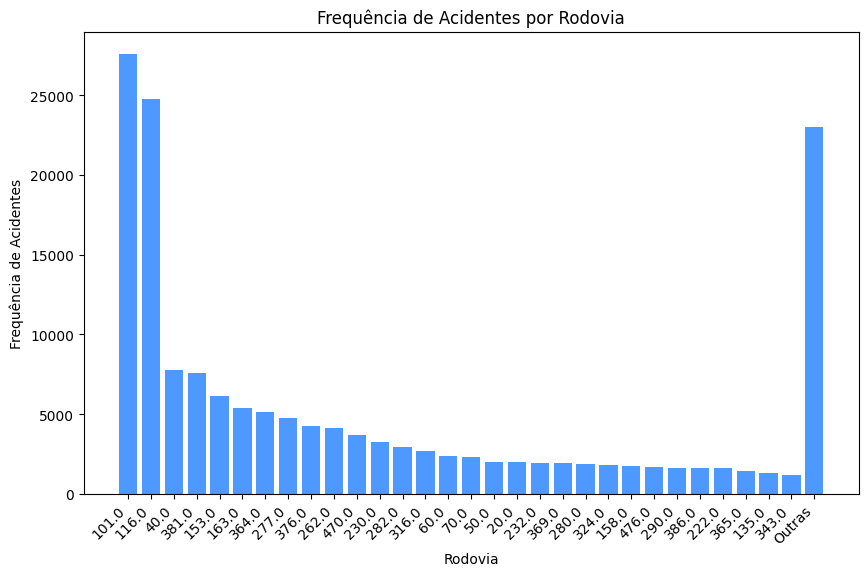

In [23]:
frequencia_rodovias = df_prf01['rodovia'].value_counts()

# Número de rodovias a serem exibidas separadamente
top_rodovias = 30

# Separando as top rodovias e as outras
top_rodovias_data = frequencia_rodovias.head(top_rodovias)
outras_rodovias_data = frequencia_rodovias.iloc[top_rodovias:].sum()

# Criando um novo DataFrame com as rodovias top e uma entrada para 'outras'
df_plot = pd.DataFrame({'rodovia': top_rodovias_data.index, 'frequencia': top_rodovias_data.values})
df_plot = df_plot.append({'rodovia': 'Outras', 'frequencia': outras_rodovias_data}, ignore_index=True)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(df_plot['rodovia'].astype(str), df_plot['frequencia'], color='#4D99FF',width=0.8)
plt.xlabel('Rodovia')
plt.ylabel('Frequência de Acidentes')
plt.title('Frequência de Acidentes por Rodovia')
plt.xticks(rotation=45, ha='right')  # Para rotacionar os rótulos do eixo x
plt.show()


In [ ]:
# Tabela para visualizar a frequência e a porcentagem de acidentes por rodovia
# Calculando porcentagens e arredondando
total_acidentes = frequencia_rodovias.sum()
df_plot['porcentagem'] = ((df_plot['frequencia'] / total_acidentes) * 100).round(1)

# Exibindo a tabela
tabela_rodovias = df_plot[['rodovia', 'frequencia', 'porcentagem']]
print("Tabela de Frequência de Acidentes por Rodovia:")
print(tabela_rodovias)


Tabela de Frequência de Acidentes por Rodovia:
   rodovia  frequencia  porcentagem
0    101.0       27588         17.1
1    116.0       24732         15.3
2     40.0        7787          4.8
3    381.0        7549          4.7
4    153.0        6109          3.8
5    163.0        5405          3.3
6    364.0        5162          3.2
7    277.0        4780          3.0
8    376.0        4282          2.7
9    262.0        4100          2.5
10   470.0        3700          2.3
11   230.0        3222          2.0
12   282.0        2915          1.8
13   316.0        2680          1.7
14    60.0        2366          1.5
15    70.0        2319          1.4
16    50.0        2024          1.3
17    20.0        2010          1.2
18   232.0        1964          1.2
19   369.0        1905          1.2
20   280.0        1859          1.2
21   324.0        1797          1.1
22   158.0        1728          1.1
23   476.0        1708          1.1
24   290.0        1637          1.0
25   386.0       

- Dentre as 120 rodovias federais, observa-se uma distribuição significativa de incidentes, indicando a necessidade de avaliar e melhorar as condições de segurança em diversas áreas do país.
- As rodovias BR 101 e BR 116 representam uma parcela significativa dos acidentes, totalizando 32% dos registros. Isso sugere que essas rodovias podem demandar atenção prioritária em termos de fiscalização, melhorias na infraestrutura ou implementação de medidas de segurança.
- Embora a BR 40 e BR 381 possuam uma quantidade menor de acidentes em comparação com a BR 101 e BR 116, o seu total combinado de 15.336 registros indica uma considerável relevância na análise. Isso pode ser resultado de fatores específicos em determinadas seções dessas rodovias que requerem investigação detalhada.
- Ao considerar as extensões das rodovias, é possível notar que as BR 101 (4.800 km) e BR 116 (4.000 km) têm uma extensão significativa em relação às outras rodovias citadas. Isso reforça a importância de implementar medidas de segurança eficazes nessas rodovias, dada a sua extensão e frequência de acidentes.


###4.3- Gravidade dos acidentes

<ipython-input-24-66b214957bfb>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categorias, y=quantidades, palette="Blues")


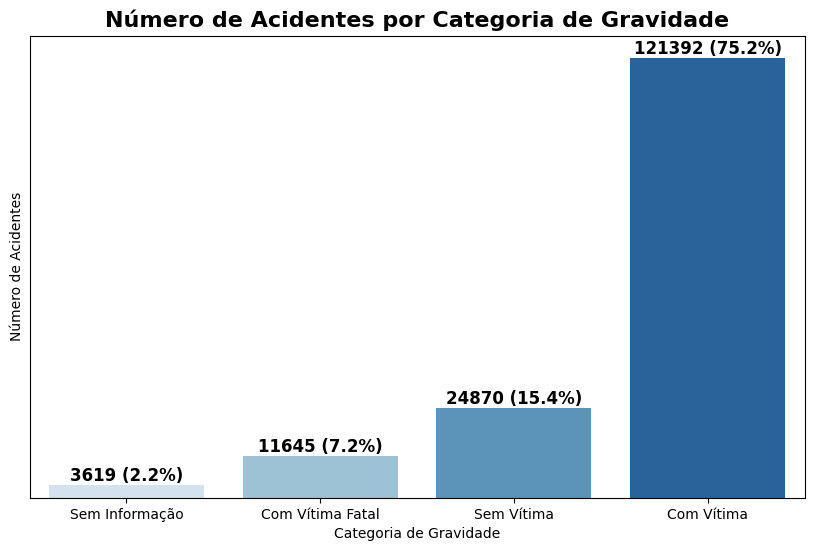

In [24]:
# Criando as colunas para categorias de acidentes
df_prf01['acidente_com_vitima_fatal'] = df_prf01['mortos'] > 0
df_prf01['acidente_com_vitima'] = ((df_prf01['mortos'] == 0) & (df_prf01['feridos'] > 0))
df_prf01['acidente_sem_vitima'] = (df_prf01['mortos'] == 0) & (df_prf01['feridos'] == 0) & (df_prf01['ilesos'] > 0)
df_prf01['acidente_sem_informacao'] = (df_prf01['mortos'] == 0) & (df_prf01['feridos'] == 0) & (df_prf01['ilesos'] == 0) & (df_prf01['ignorados'] > 0)

# Calculando o número de acidentes em cada categoria
acidente_com_vitima_fatal = df_prf01['acidente_com_vitima_fatal'].sum()
acidente_com_vitima = df_prf01['acidente_com_vitima'].sum()
acidente_sem_vitima = df_prf01['acidente_sem_vitima'].sum()
acidente_sem_informacao = df_prf01['acidente_sem_informacao'].sum()
total_acidentes = df_prf01.shape[0]

# Criando um gráfico de barras com paleta de cores ajustada
categorias = ['Com Vítima Fatal', 'Com Vítima', 'Sem Vítima', 'Sem Informação']
quantidades = [acidente_com_vitima_fatal, acidente_com_vitima, acidente_sem_vitima, acidente_sem_informacao]

# Ordenando as categorias e quantidades
categorias, quantidades = zip(*sorted(zip(categorias, quantidades), key=lambda x: x[1]))

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=categorias, y=quantidades, palette="Blues")

# Adicionando os valores e porcentagens acima de cada barra
for bar, value in zip(ax.patches, quantidades):
    height = bar.get_height()
    percentage = (value / total_acidentes) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{value} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Removendo a numeração do eixo y
plt.yticks([])

plt.xlabel('Categoria de Gravidade')
plt.ylabel('Número de Acidentes')
plt.title('Número de Acidentes por Categoria de Gravidade', fontsize=16, fontweight='bold')

plt.show()



- Dos 161.526 registros de acidentes ocorridos entre 2021 e 2023, a maioria, representando 75%, são classificados como acidentes com vítimas.

- Um percentual de 7% do total de acidentes, equivalente a 11.645 ocorrências, resultou em vítimas fatais.

- Cerca de 15% dos acidentes registrados não envolveram vítimas.

##5- Identificação de Áreas de Alto Risco

Nesta fase, será concentrado os esforços na identificação das rodovias e seus trechos onde a incidência de acidentes com vítimas e vítimas fatais é mais significativa.

O objetivo é mapear essas áreas críticas e avaliar a presença de radares nelas. Isso nos permitirá entender se as áreas de alto risco estão adequadamente equipadas com dispositivos de controle de velocidade e, consequentemente, explorar oportunidades de melhorias na segurança viária.

###5.1 - Identificação de Trechos com Maior Incidência de Vítimas e Vítimas Fatais
Nesta etapa será realizada as seguintes ações:

- Agrupamento das colunas de rodovia e quilômetro (km) nos dados de acidentes.
- Calculo da frequência de acidentes por categoria: vítimas fatais, vítimas, sem vítimas e sem informação.
- Visualização de uma tabela resumo com as informações obtidas ordenadas com base no número de vítimas fatais e acidentes com vítimas, apresentando os 20 maiores registros.

In [25]:
# Acrecentando BR na coluna rodovia
df_prf01['rodovia'] = df_prf01['rodovia'].apply(lambda x: f'BR-{int(x)}')

# Criando uma variável que representa a rodovia e o km da rodovia
df_prf01['rodovia_km'] = df_prf01['rodovia'].astype(str) + ', km-' + df_prf01['km'].astype(str)

# Agrupando os acidentes por rodovia e km
acidentes_por_rodovia_km = df_prf01.groupby(['rodovia_km'])[
    'acidente_com_vitima_fatal', 'acidente_com_vitima', 'acidente_sem_vitima', 'acidente_sem_informacao'].sum().reset_index()

<ipython-input-25-3b3da1e14cbe>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  acidentes_por_rodovia_km = df_prf01.groupby(['rodovia_km'])[


In [26]:
#Filtrando acidentes por KM das Rodovias ordenando por maior ocorrencia de vítimas fatais e vítimas.
acidentes_por_rodovia_km.sort_values(['acidente_com_vitima_fatal','acidente_com_vitima'], ascending = False).head(20)

,rodovia_km,acidente_com_vitima_fatal,acidente_com_vitima,acidente_sem_vitima,acidente_sem_informacao
0,"BR-0, km-desconhecido",10,158,268,6
6960,"BR-116, km-229",7,79,11,2
6796,"BR-116, km-212",7,45,9,0
38227,"BR-364, km-349",7,33,2,0
12165,"BR-153, km-239",7,10,5,3
762,"BR-101, km-122",6,45,11,0
6594,"BR-116, km-188",6,23,4,2
6980,"BR-116, km-230",5,119,9,2
1020,"BR-101, km-148",5,78,6,4
6813,"BR-116, km-214",5,74,14,3


- A BR-116, km-229, destaca-se com uma alta frequência de acidentes fatais, indicando áreas de alto risco que demandam atenção especial.

- O trecho da BR-116, km-212, também apresenta uma incidência considerável de acidentes com vítimas fatais.

- Na BR-364, km-349, embora o número total de acidentes seja relativamente baixo, a presença de vítimas fatais é alarmante e requer investigação adicional.

- Outro trecho preocupante é a BR-153, km-239, com uma proporção significativa de vítimas fatais em relação ao número total de acidentes.

- Novamente, a BR-116 agora no km-230, é destacada com um número significativo de vítimas feridas, indicando a necessidade de investigação e medidas preventivas. A BR-116 representa a maioria dos trechos com vítimas nos registros analisados, evidenciando a urgência de intervenções nessa rodovia.

### 5.2 - Relação dos acidentes com a localização dos Radares
- Criação de uma nova coluna 'rodovia_km_acidentes' no DataFrame df_prf01 e atualização da coluna 'rodovia_km' no DataFrame df_radar01. Ambas as colunas servem para identificar exclusivamente a localização de cada ponto (seja de acidente ou de radar) ao longo das rodovias, facilitando a comparação e a análise dos dados.
- Agrupamento dos dados pelo identificador único de cada trecho representado pela combinação de rodovia e quilômetro com a contagem do número de radares em cada trecho de rodovia.
- Seleção das principais rodovias e trechos, ordenando-os com base no número de acidentes com vítimas fatais e acidentes com vítimas. Essa análise nos permitirá identificar as áreas mais críticas que requerem atenção especial em termos de segurança viária e presença de radares.

In [27]:
# Criando uma lista de rodovias e quilômetros (rodovia_km) a partir do dataframe de acidentes e de radares.
rodovia_km_acidentes = df_prf01['rodovia'].astype(str) + ', km-' + df_prf01['km'].astype(str)
df_radar01['rodovia_km'] = df_radar01['rodovia'].astype(str) + ', km-' + df_radar01['Km'].astype(str)

In [28]:
# Contando o número de radares em cada rodovia e quilômetro (rodovia_km) a partir do dataframe de radares:
radares_por_rodovia_km = df_radar01.groupby(['rodovia_km']).size().reset_index(name='quantidade_radares')


In [29]:
# Mesclando os dados de acidentes e radares usando a coluna 'rodovia_km'
acidentes_radar_por_rodovia = pd.merge(acidentes_por_rodovia_km, radares_por_rodovia_km, on='rodovia_km', how='left')


In [30]:
# Preenchendo os valores NaN (sem correspondência de radares) com 0:
acidentes_radar_por_rodovia['quantidade_radares'].fillna(0, inplace=True)


In [31]:
# Selecionando as colunas desejadas
selec_colunas = ['rodovia_km', 'acidente_com_vitima_fatal', 'acidente_com_vitima', 'quantidade_radares']
rodovias= acidentes_radar_por_rodovia[selec_colunas].sort_values(['acidente_com_vitima_fatal', 'acidente_com_vitima'], ascending=False).head(20)
rodovias

,rodovia_km,acidente_com_vitima_fatal,acidente_com_vitima,quantidade_radares
0,"BR-0, km-desconhecido",10,158,0.0
6960,"BR-116, km-229",7,79,0.0
6796,"BR-116, km-212",7,45,0.0
38227,"BR-364, km-349",7,33,1.0
12165,"BR-153, km-239",7,10,0.0
762,"BR-101, km-122",6,45,0.0
6594,"BR-116, km-188",6,23,0.0
6980,"BR-116, km-230",5,119,0.0
1020,"BR-101, km-148",5,78,0.0
6813,"BR-116, km-214",5,74,0.0


#### 6- Conclusão

- Ao avaliar a correlação entre a presença de radares e a ocorrência de acidentes em trechos de rodovias, observamos padrões reveladores que merecem atenção especial.

- É preocupante notar que os trechos com os maiores números de acidentes frequentemente carecem de sistemas de monitoramento por radar. Isso sugere uma lacuna na infraestrutura de segurança viária que pode contribuir para a incidência de acidentes.

- A análise revelou que, dos trechos identificados como os mais perigosos, apenas um trecho da BR 364 possui a presença de um radar. Essa discrepância ressalta a necessidade de expandir a cobertura de radares em trechos críticos para melhorar a segurança nas rodovias.
Carência de Radares na BR 116:

- A BR 116, que registrou o maior número de acidentes, destaca-se pela ausência completa de radares em seus trechos críticos. Essa falta de monitoramento pode contribuir significativamente para a ocorrência e gravidade dos acidentes nessa rodovia.

- Diante dessas constatações, ressalta-se a necessidade premente de implementar mais radares nos trechos com alta incidência de acidentes. Essa medida não apenas permite o controle de velocidade, mas também desencoraja comportamentos imprudentes dos condutores, contribuindo para a redução dos acidentes e a preservação de vidas.

- A análise reforça a importância de políticas públicas e investimentos direcionados à segurança viária, especialmente na implantação e manutenção de sistemas de monitoramento eficazes em trechos críticos das rodovias.